In [18]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import time
import numpy as np

from river import stats
from river import drift
from river import utils

import matplotlib.pyplot as plt

In [20]:
np.random.seed(42)

n_instances = 20000
stream = np.concatenate(
    (
        np.random.uniform(low=0, high=1, size=n_instances),
        np.random.uniform(low=1, high=2, size=n_instances),
        np.random.uniform(low=0, high=1, size=n_instances)
    )
)

In [21]:
stream

array([0.37454012, 0.95071431, 0.73199394, ..., 0.30467486, 0.40736253,
       0.52283339])

In [22]:
np.mean(stream[1000:])

0.8387179578541673

In [23]:
mean = stats.Mean()
rolling_mean = utils.Rolling(stats.Mean(), window_size=1000)
vals = []
rolling_vals = []
for i, t in enumerate(stream):
    vals.append(mean.update(t).get())
    rolling_vals.append(rolling_mean.update(t).get())

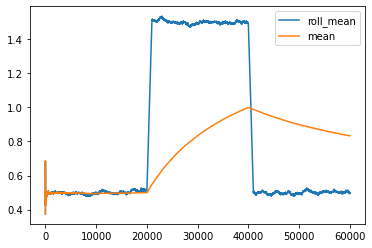

In [24]:
plt.plot(rolling_vals, label='roll_mean')
plt.plot(vals, label='mean')
plt.legend()

In [25]:
# stream = get_stream()
adwin = drift.ADWIN()
drift_pos = []

total_time = 0
for i, t in enumerate(stream):
    start = time.time()
    adwin.update(t)
    total_time += (time.time() - start)
    if adwin.drift_detected:
        print(f'Drift detected at {i}')
        drift_pos.append(i)
        
print("Total time:", total_time)

Drift detected at 20095
Drift detected at 40095
Total time: 0.09630107879638672


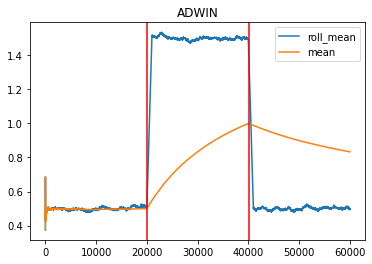

In [26]:
plt.plot(rolling_vals, label='roll_mean')
plt.plot(vals, label='mean')
plt.legend()
for x in drift_pos:
    plt.axvline(x, color='r')
plt.title('ADWIN')
plt.show()
plt.close()

In [27]:
from adwin import ADWIN

# stream = get_stream()
adwin = ADWIN(delta=.002)
drift_pos = []

total_time = 0
for i, t in enumerate(stream):
    start = time.time()
    adwin.update(t)
    total_time += (time.time() - start)
    if adwin.drift_detected:
        print(f'Drift detected at {i}')
        drift_pos.append(i)

print("Total time:", total_time)

Drift detected at 20031
Drift detected at 40031
Total time: 0.546893835067749


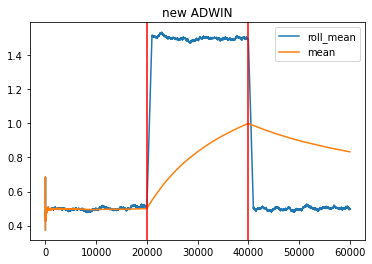

In [28]:
plt.plot(rolling_vals, label='roll_mean')
plt.plot(vals, label='mean')
plt.legend()
for x in drift_pos:
    plt.axvline(x, color='r')
plt.title('new ADWIN')
plt.show()
plt.close()